# Analysis-of-crimes-in-canada-over-14-years

In [38]:
#Here I have imported all the essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [39]:
#Now I import the data
df = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/input/crime.csv')
df['counter'] = 1
df.head

<bound method NDFrame.head of                                                      TYPE  YEAR  MONTH  DAY  \
0                                             Other Theft  2003      5   12   
1                                             Other Theft  2003      5    7   
2                                             Other Theft  2003      4   23   
3                                             Other Theft  2003      4   20   
4                                             Other Theft  2003      4   12   
5                                             Other Theft  2003      3   26   
6                       Break and Enter Residential/Other  2003      3   10   
7                                                Mischief  2003      6   28   
8                                             Other Theft  2003      2   16   
9                       Break and Enter Residential/Other  2003      7    9   
10                                            Other Theft  2003      1   31   
11                    

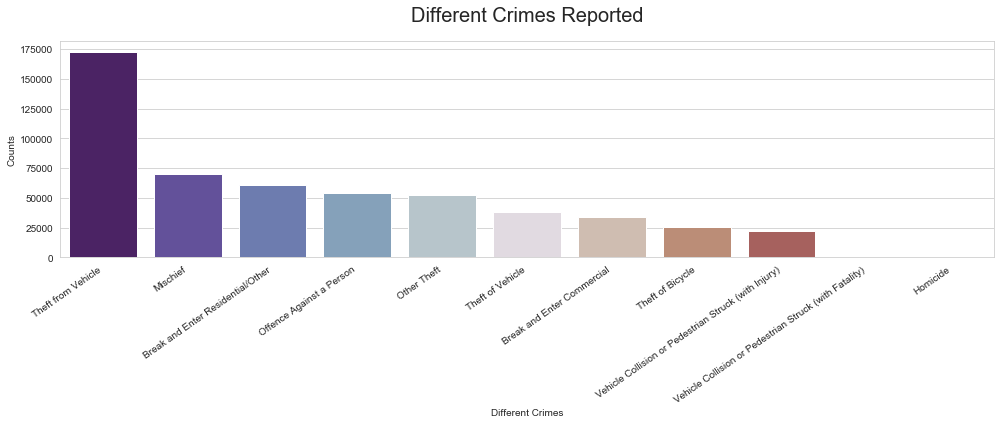

In [49]:
plt.figure(figsize=(14,6))
plt.title('Different Crimes Reported',fontdict={'fontsize':'20'},pad=20)
ax = sns.countplot(x='TYPE',data=df,palette='twilight_shifted', order = df['TYPE'].value_counts().index)
ax.set(xlabel='Different Crimes')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.tight_layout()

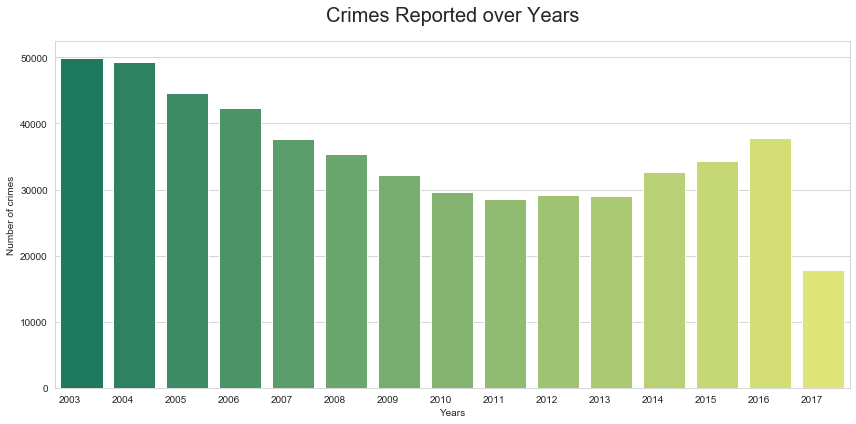

In [41]:
plt.figure(figsize=(12,6))
plt.title('Crimes Reported over Years',fontdict={'fontsize':'20'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='summer')
ax.set(xlabel='Years', ylabel='Number of crimes')
plt.setp(ax.get_xticklabels(), horizontalalignment='right')
plt.tight_layout()

# 10 Dangerous Areas in the city

In [51]:
dangerous_areas = df.groupby(['NEIGHBOURHOOD','TYPE']).count()['counter'].sort_values(ascending=False).head(10)
dangerous_areas

NEIGHBOURHOOD              TYPE                      
Central Business District  Theft from Vehicle            48003
                           Other Theft                   19244
West End                   Theft from Vehicle            16904
Central Business District  Mischief                      16672
Fairview                   Theft from Vehicle            11934
Mount Pleasant             Theft from Vehicle             9679
Central Business District  Break and Enter Commercial     9371
Kitsilano                  Theft from Vehicle             8912
Renfrew-Collingwood        Theft from Vehicle             8420
Kensington-Cedar Cottage   Theft from Vehicle             7474
Name: counter, dtype: int64

# 10 Safest Areas in the city

In [43]:
Safest_areas = df.groupby(['NEIGHBOURHOOD','TYPE']).count()['counter'].sort_values(ascending=True).head(10)
Safest_areas

NEIGHBOURHOOD      TYPE                                                  
Musqueam           Other Theft                                               1
                   Vehicle Collision or Pedestrian Struck (with Fatality)    1
South Cambie       Vehicle Collision or Pedestrian Struck (with Fatality)    2
Arbutus Ridge      Vehicle Collision or Pedestrian Struck (with Fatality)    3
Dunbar-Southlands  Vehicle Collision or Pedestrian Struck (with Fatality)    3
Riley Park         Vehicle Collision or Pedestrian Struck (with Fatality)    4
West Point Grey    Vehicle Collision or Pedestrian Struck (with Fatality)    4
West End           Vehicle Collision or Pedestrian Struck (with Fatality)    6
Oakridge           Vehicle Collision or Pedestrian Struck (with Fatality)    6
Stanley Park       Vehicle Collision or Pedestrian Struck (with Fatality)    6
Name: counter, dtype: int64

# Year having maximum crimes being reported

In [44]:
df.groupby(['YEAR']).count()['counter'].sort_values(ascending=False).head(1)


YEAR
2003    49928
Name: counter, dtype: int64

# Month having maximum crimes being reported

In [45]:
df.groupby(['MONTH']).count()['counter'].sort_values(ascending=False).head(1)


MONTH
5    46883
Name: counter, dtype: int64

# Top 5 NEIGHBOURHOOD with maximum crime rates

In [46]:
df.groupby(['NEIGHBOURHOOD']).count()['counter'].sort_values(ascending=False).head(5)


NEIGHBOURHOOD
Central Business District    110947
West End                      41352
Fairview                      32161
Mount Pleasant                30536
Grandview-Woodland            27180
Name: counter, dtype: int64

# Number of Crimes Daywise

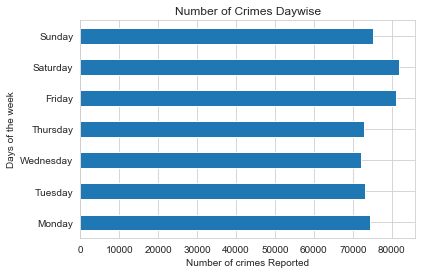

In [47]:
df['Date'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})
df['DayOfWeek'] = df['Date'].dt.weekday_name
df['DayOfWeekID'] = df['Date'].dt.weekday
%matplotlib inline
# Adding Days Lookup
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping dataframe by Day of Week ID and plotting
df.groupby(df["DayOfWeekID"]).size().plot(kind='barh')

# Customizing Plot 
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes Reported')
plt.title('Number of Crimes Daywise')
plt.show()

# Crime Types trends over the years

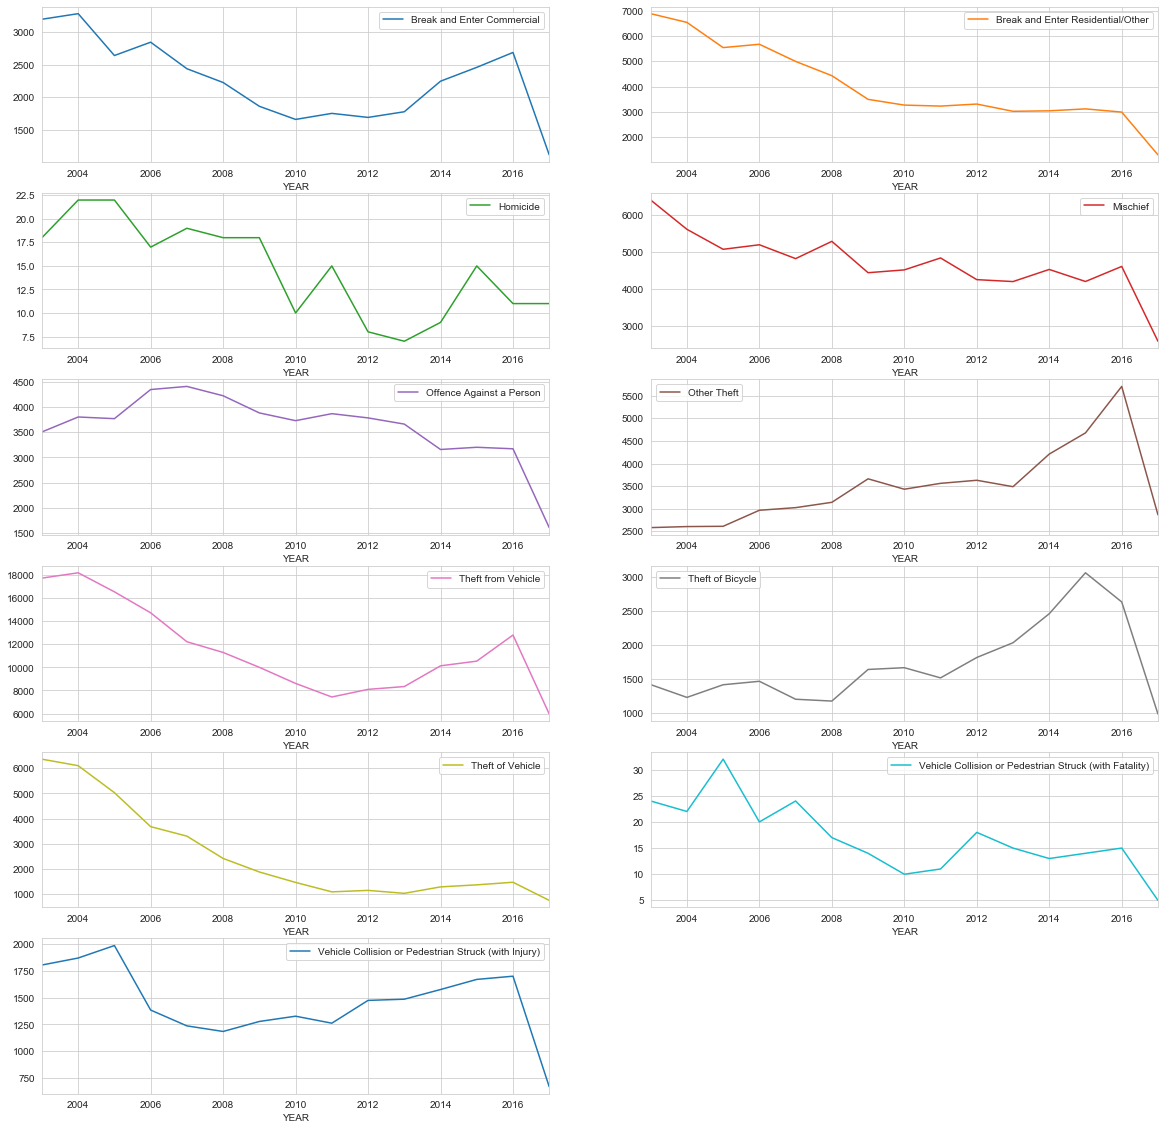

In [48]:
df['Incident'] = 1
%matplotlib inline
# Crime count by Category per year
dfPivCrimeDate = df.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='TYPE'
                                     ,index='YEAR'
                                     ,fill_value=0)
plo = dfPivCrimeDate.plot(figsize=(20, 20), subplots=True, layout=(-1, 2), sharex=False, sharey=False)